<a href="https://colab.research.google.com/github/chieri7/Machine-Learning-Final-Code/blob/main/Machine_Learning_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import**

In [1]:
!pip install xgboost

In [2]:
!pip install catboost

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier  # Replace LightGBM with CatBoost
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score, roc_auc_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import pickle
warnings.filterwarnings('ignore')

Raw Data

In [4]:
# Raw Data
path = "Lung Cancer Dataset.csv"
df = pd.read_csv(path)

In [5]:
df.head(5)

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


In [6]:
df.shape

(5000, 18)

Observation : There are 5000 rows, 18 columns including 1 target column in this data set

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [8]:
df.duplicated().sum()

0

No duplicates found

In [9]:
df.isna().sum()

,0
AGE,0
GENDER,0
SMOKING,0
FINGER_DISCOLORATION,0
MENTAL_STRESS,0
EXPOSURE_TO_POLLUTION,0
LONG_TERM_ILLNESS,0
ENERGY_LEVEL,0
IMMUNE_WEAKNESS,0
BREATHING_ISSUE,0


No null rows found

**Summary Statistics**

In [10]:
df.describe()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE
count,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,57.222800,0.501200,0.666400,0.6012,0.539800,0.516000,0.439200,55.032043,0.394800,0.80040,0.354200,0.698200,94.991029,0.600600,0.301800,0.204000,0.209600
std,15.799224,0.500049,0.471546,0.4897,0.498463,0.499794,0.496339,7.913083,0.488857,0.39974,0.478318,0.459085,1.481048,0.489824,0.459085,0.403009,0.407064
min,30.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,23.258308,0.000000,0.00000,0.000000,0.000000,89.923133,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,49.440685,0.000000,1.00000,0.000000,0.000000,93.973176,0.000000,0.000000,0.000000,0.000000
50%,57.000000,1.000000,1.000000,1.0000,1.000000,1.000000,0.000000,55.050421,0.000000,1.00000,0.000000,1.000000,94.974073,1.000000,0.000000,0.000000,0.000000
75%,71.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,60.323320,1.000000,1.00000,1.000000,1.000000,95.989272,1.000000,1.000000,0.000000,0.000000
max,84.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,83.046971,1.000000,1.00000,1.000000,1.000000,99.795786,1.000000,1.000000,1.000000,1.000000


In [11]:
# Counts
df['PULMONARY_DISEASE'].value_counts(normalize= True)

,proportion
PULMONARY_DISEASE,
NO,0.5926
YES,0.4074


This is a fairly Balanced dataset

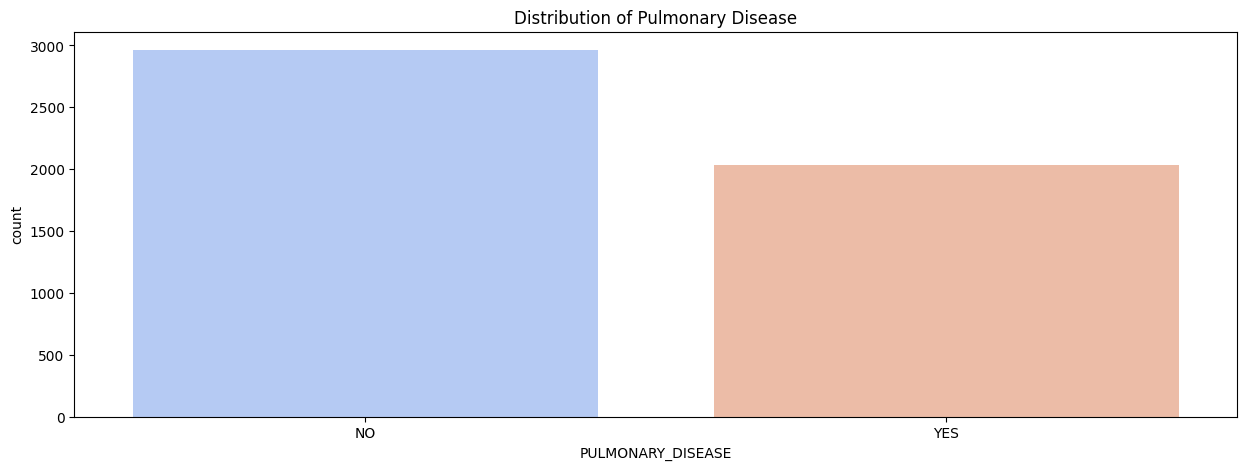

In [12]:
plt.figure(figsize=(15, 5))
sns.countplot(x=df['PULMONARY_DISEASE'], palette="coolwarm")
plt.title("Distribution of Pulmonary Disease")
plt.show()

The difference in the number of samples between the classes is around 1000, meaning the "no disease" class has 1.5 times more samples than the "disease" class. This is generally not a problem, especially when the sample size is large. Many machine learning algorithms, such as decision trees and random forests, are quite robust to this kind of mild imbalance.So this doesnt require the handling of imbalanced data.

<Axes: >

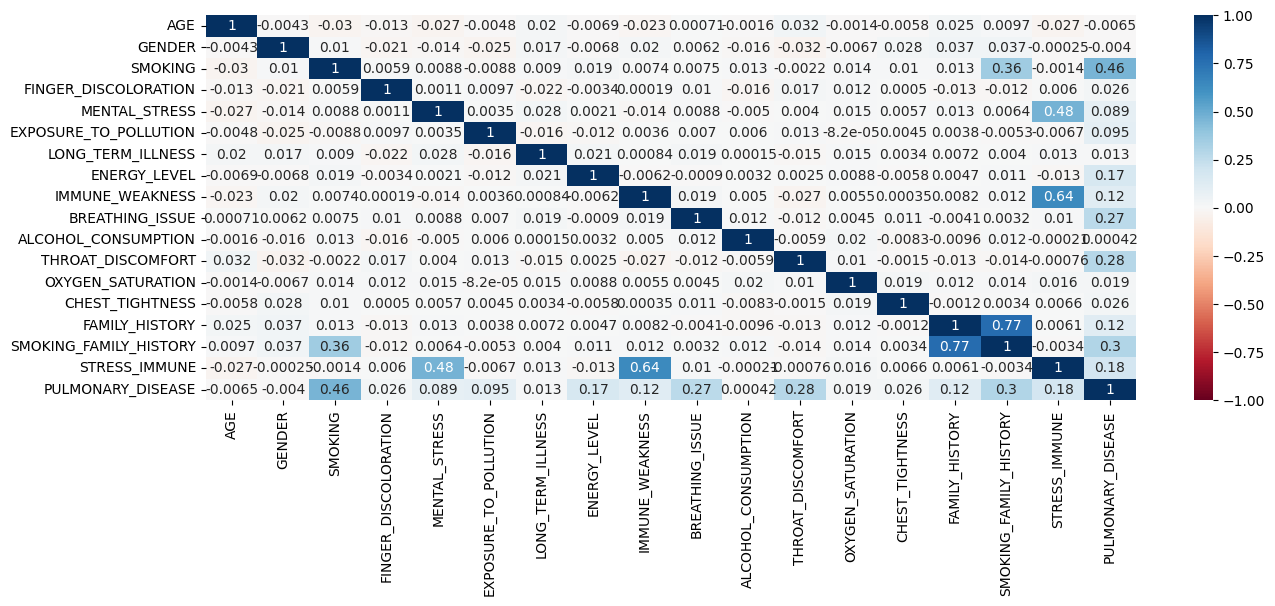

In [13]:
v = df.copy()
v['PULMONARY_DISEASE'] = pd.get_dummies(v['PULMONARY_DISEASE'],dtype=int,drop_first=True)
plt.figure(figsize=(15, 5))
sns.heatmap(v.corr(), annot=True, cmap="RdBu",vmin=-1,)

Smoking, Breathing Issue, Throat discomfort, and Smoking Family history show the highest correlation with the Target.

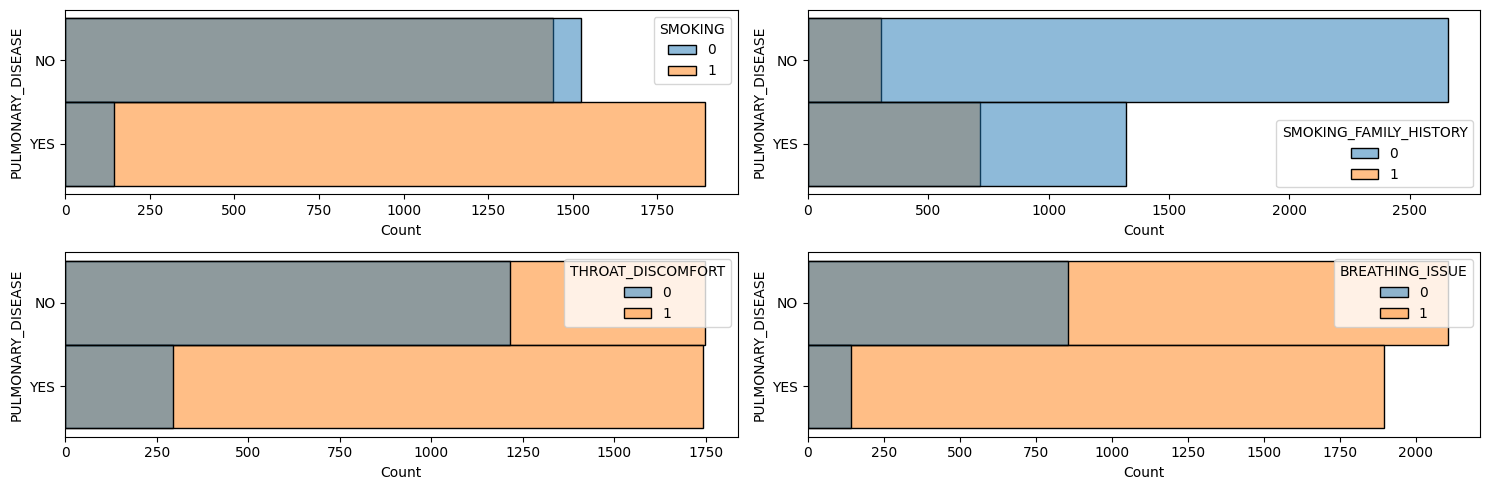

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
sns.histplot(hue= df['SMOKING'],y =df['PULMONARY_DISEASE'],ax=axes[0][0])

sns.histplot(hue= df['SMOKING_FAMILY_HISTORY'],y =df['PULMONARY_DISEASE'],ax=axes[0][1])

sns.histplot(hue= df['THROAT_DISCOMFORT'],y =df['PULMONARY_DISEASE'],ax=axes[1][0])

sns.histplot(hue= df['BREATHING_ISSUE'],y= df['PULMONARY_DISEASE'],ax=axes[1][1])

plt.tight_layout()
plt.show()

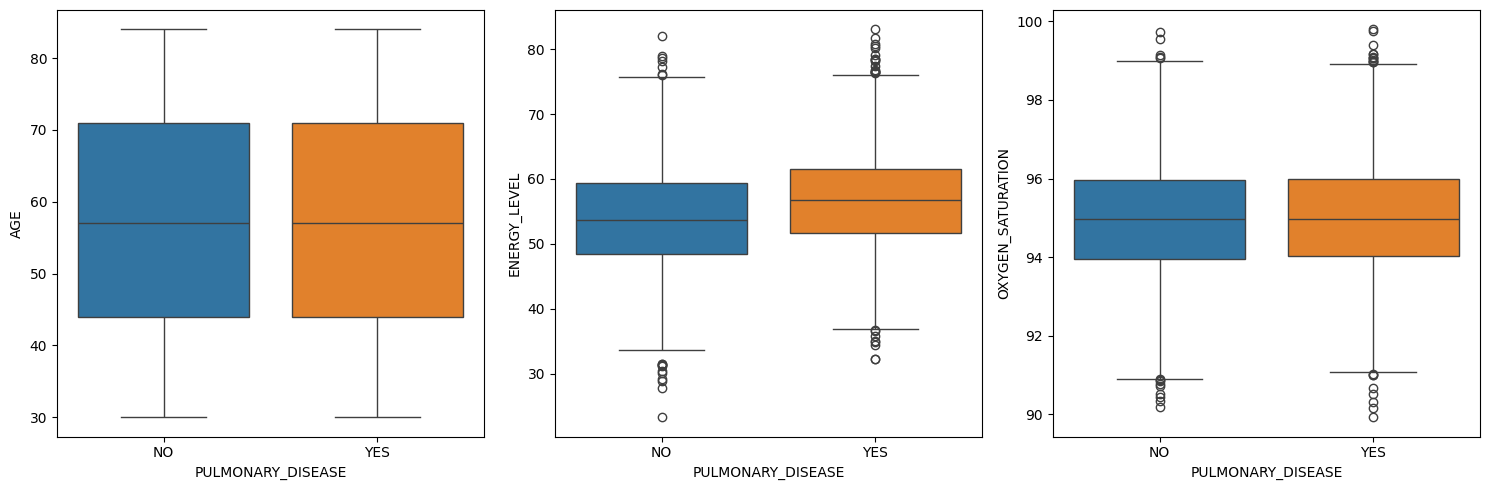

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(y= df['AGE'], x=df['PULMONARY_DISEASE'], showfliers=True, ax=axes[0], hue=df['PULMONARY_DISEASE'])
sns.boxplot(y= df['ENERGY_LEVEL'], x=df['PULMONARY_DISEASE'], showfliers=True, ax=axes[1], hue=df['PULMONARY_DISEASE'])
sns.boxplot(y= df['OXYGEN_SATURATION'], x=df['PULMONARY_DISEASE'], showfliers=True, ax=axes[2], hue=df['PULMONARY_DISEASE'])

plt.tight_layout()
plt.show()


**Modelling**

Imports

In [16]:
# Train Test split
X = df.drop(columns='PULMONARY_DISEASE')
y = df[['PULMONARY_DISEASE']]
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2 ,stratify = y,random_state=42)
X_tr, X_val ,y_tr, y_val = train_test_split(X_train,y_train, test_size = 0.25 ,stratify = y_train,random_state=42)

In [17]:
# Processing function:
def preProcessing(d,inp_type):
  df_processed = d.copy()
  #target :
  if inp_type == 'target' :
    df_processed['PULMONARY_DISEASE'] = pd.get_dummies(df_processed['PULMONARY_DISEASE'],dtype=int,drop_first=True)
    return df_processed
  #normalisation :
  if inp_type == 'feature':
    return df_processed
  print("ERROR : undefined input type ")
  return

Preprocessing

In [18]:
## Preprocessing
# y
y_train = preProcessing(y_train,'target')
y_tr = preProcessing(y_tr,'target')
y_val = preProcessing(y_val,'target')
y_test = preProcessing(y_test,'target')

# X
X_train = preProcessing(X_train,'feature')
X_tr = preProcessing(X_tr,'feature')
X_val = preProcessing(X_val,'feature')
X_test = preProcessing(X_test,'feature')

Hyperparameter tuning

In [19]:
# Define models (replace LightGBM with CatBoost)
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='auc', random_state=42),  # Move eval_metric to init
    'CatBoost': CatBoostClassifier(eval_metric='AUC', random_state=42, verbose=0)  # Move eval_metric to init, verbose=0 to suppress output
}

# Define hyperparameter grids
params = {
    'Logistic Regression': {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
        'max_iter': [100, 500, 1000],
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5, 1.0],
        'algorithm': ['SAMME', 'SAMME.R']
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.05, 0.1, 0.3],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    },
    'CatBoost': {
        'iterations': [50, 100, 200, 300],  # Number of boosting iterations
        'depth': [4, 6, 8],  # Depth of trees
        'learning_rate': [0.01, 0.05, 0.1, 0.3],
        'l2_leaf_reg': [1, 3, 5]  # L2 regularization
    }
}
# Scoring metrics for GridSearchCV
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv = 5

Grid Search

In [20]:
def result_df(models, params, scoring, refitting_metric, cv, X_tr, y_tr, X_val, y_val):
    results_table = pd.DataFrame(
        columns=['Model', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc_score', 'model_object'])
    tuned_models = {}

    for model_name, model in models.items():
        print(f"Training {model_name}...")
        mod = GridSearchCV(
            model,
            params[model_name],
            scoring=scoring,
            cv=cv,
            refit=refitting_metric,
            n_jobs=20
        )
        # Standard fit without eval_set for GridSearchCV
        mod.fit(X_tr, y_tr.values.ravel())

        model_tuned = mod.best_estimator_
        tuned_models[model_name] = model_tuned

        with open(f'{model_name}_tuned.pkl', 'wb') as to_write:
            pickle.dump(model_tuned, to_write)

        with open(f'{model_name}_tuned.pkl', 'rb') as to_read:
            model_tuned = pickle.load(to_read)

        model_tuned_preds = model_tuned.predict(X_val)
        accuracy = accuracy_score(y_val, model_tuned_preds)
        precision = precision_score(y_val, model_tuned_preds)
        f1 = f1_score(y_val, model_tuned_preds)
        recall = recall_score(y_val, model_tuned_preds)
        roc = roc_auc_score(y_val, model_tuned_preds)

        results_table.loc[len(results_table)] = [model_name, accuracy, precision, recall, f1, roc, model_tuned]

    return results_table, tuned_models

In [21]:
# Train models and get results
results, tuned_models = result_df(models, params, scoring, 'roc_auc', cv, X_tr, y_tr, X_val, y_val)
results.sort_values(by=['recall', 'f1', 'accuracy', 'precision'], ascending=False, inplace=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
print("\nMetrics report:")
print(results)

Training Logistic Regression...
Training Random Forest...
Training AdaBoost...
Training XGBoost...
Training CatBoost...

Metrics report:
                 Model  accuracy  precision    recall        f1  roc_auc_score  \
3              XGBoost     0.905   0.906250  0.855037  0.879899       0.897164   
4             CatBoost     0.904   0.908136  0.850123  0.878173       0.895550   
1        Random Forest     0.904   0.910290  0.847666  0.877863       0.895165   
2             AdaBoost     0.882   0.862155  0.845209  0.853598       0.876230   
0  Logistic Regression     0.889   0.883420  0.837838  0.860025       0.880976   

                                                                                                                                                                                                                                                                                                                                                                                  


XGBoos Model Evaluation:
Accuracy  : 0.90
Precision : 0.88
F1 Score  : 0.88
Recall    : 0.88
ROC AUC   : 0.90

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       593
           1       0.88      0.88      0.88       407

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000


Confusion Matrix:


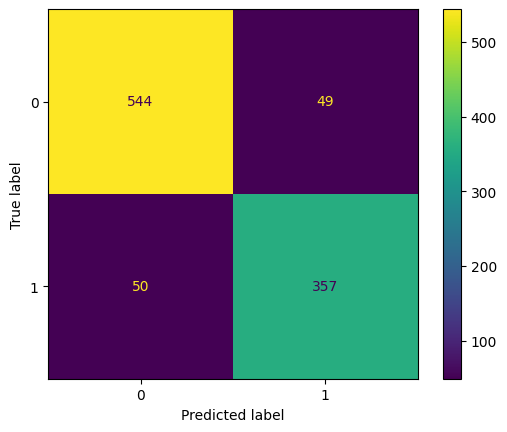

In [25]:
with open('XGBoost_tuned.pkl', 'rb') as f:
    mod = pickle.load(f)

# Fit with early stopping for final evaluation
mod.fit(X_train, y_train.values.ravel(), eval_set=[(X_val, y_val.values.ravel())],verbose=False)
y_preds = mod.predict(X_test)

print(f"\nXGBoos Model Evaluation:")
print(f"Accuracy  : {accuracy_score(y_test, y_preds):.2f}")
print(f"Precision : {precision_score(y_test, y_preds):.2f}")
print(f"F1 Score  : {f1_score(y_test, y_preds):.2f}")
print(f"Recall    : {recall_score(y_test, y_preds):.2f}")
print(f"ROC AUC   : {roc_auc_score(y_test, y_preds):.2f}")
print("\nClassification report:")
print(classification_report(y_test, y_preds))
print("\nConfusion Matrix:")

cm = confusion_matrix(y_test, y_preds, labels=mod.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mod.classes_)
disp.plot()
plt.show()

Learning Curve

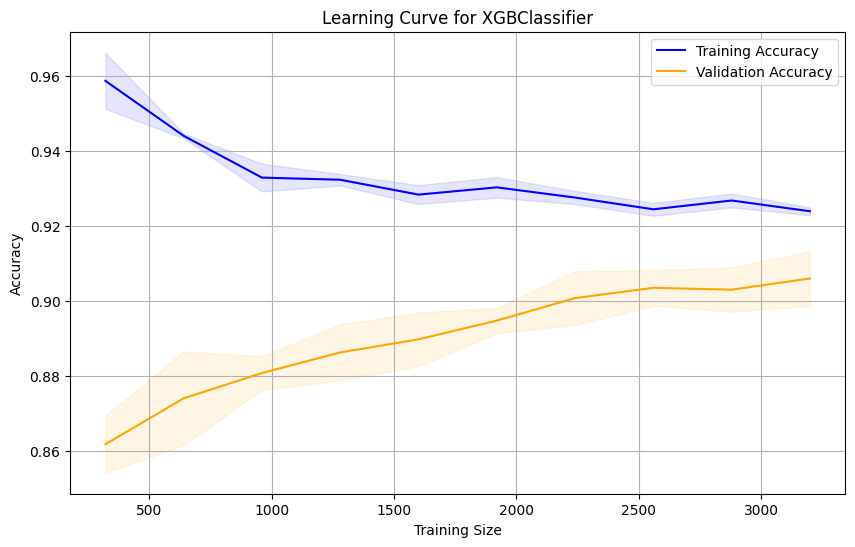

Training mean accuracy: [0.95875    0.9440625  0.93291667 0.93234375 0.928375   0.9303125
 0.92758929 0.92445312 0.92680556 0.9239375 ]
Validation mean accuracy: [0.86175 0.874   0.88075 0.88625 0.88975 0.89475 0.90075 0.9035  0.903
 0.906  ]


In [26]:
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'):
    fit_params = {'eval_set': [(X_val, y_val.values.ravel())], 'verbose': False} \
        if estimator.__class__.__name__ in ['XGBClassifier', 'CatBoostClassifier'] else None
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring, n_jobs=1, random_state=42,
        fit_params=fit_params
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
    plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.1)
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve for {estimator.__class__.__name__}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    return train_sizes, train_mean, val_mean

# Plot learning curve for CatBoost
train_sizes, train_mean, val_mean = plot_learning_curve(mod, X_train, y_train.values.ravel(), cv=5, scoring='accuracy')
print("Training mean accuracy:", train_mean)
print("Validation mean accuracy:", val_mean)

Feature importance

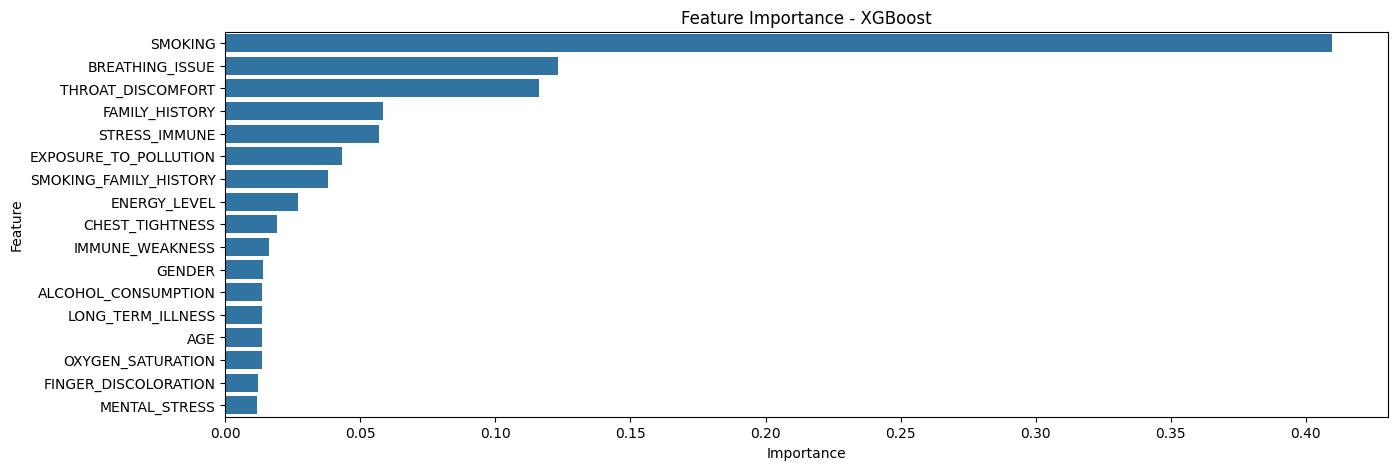

In [28]:
feature_importances = mod.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - XGBoost')
plt.show()